<a href="https://colab.research.google.com/github/0Kyumy0/Machine_Learning_CodingDojo/blob/Unsupervised_models/KmeansExcersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
filename = '/content/drive/MyDrive/DataScience/BasesDeDatos/cust_seg.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info() # there are missing values at the 'Defaulted' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [ ]:
df.duplicated().sum()

0

# Cleaning and exploration

In [ ]:
# I renamed the columns in the same way as the original, but adding underscores at the spaces between words
df = df.rename(columns={'Years Employed': 'Years_Employed', 'Card Debt': 'Card_Debt', 'Other Debt': 'Other_Debt'})

In [ ]:
df = df.drop(columns='Unnamed: 0') # drop the inncesary column an set the 'Customer Id' as the Id of the data set.
df = df.set_index('Customer Id', drop=True)

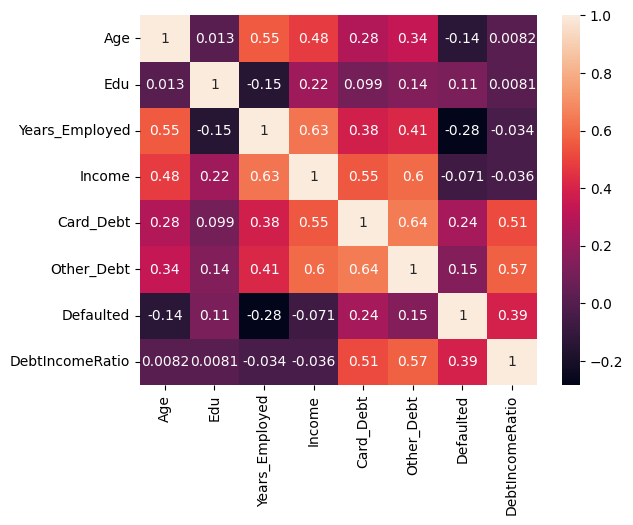

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True);

### Age

In [ ]:
# will make ranges for the ages.
print(df['Age'].min())
print(df['Age'].max())

20
56


In [ ]:
bins = [20, 30, 40, 50, 60]

labels = ['20-29', '30-39', '40-49', '50-56']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)

### Education

In [ ]:
# i'll consider these as ordinals.
print(df['Edu'].min())
print(df['Edu'].max())

1
5


### Years Employed

In [ ]:
print(df['Years_Employed'].min())
print(df['Years_Employed'].max())

0
33


In [ ]:
bins = [0, 5, 10, 20, 30, 35]

labels = ['0-4', '5-9', '10-19', '20-29', '30-34']
df['Years_Employed'] = pd.cut(df['Years_Employed'], bins=bins, labels=labels)

### Income

In [ ]:
# I'm going to leave these values as they are, but will convert them to floats and consider them as numeric values.
print(df['Income'].min())
print(df['Income'].max())

13
446


In [ ]:
df['Income'] = df['Income'].astype(float)

In [ ]:
df.head()

,Age,Edu,Years_Employed,Income,Card_Debt,Other_Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,40-49,2,5-9,19.0,0.124,1.073,0.0,6.3
2,40-49,1,20-29,100.0,4.582,8.218,0.0,12.8
3,30-39,2,5-9,57.0,6.111,5.802,1.0,20.9
4,20-29,2,0-4,19.0,0.681,0.516,0.0,6.3
5,40-49,1,30-34,253.0,9.308,8.908,0.0,7.2
